  State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.

C:\Users\hadho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hadho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hadho\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-pack

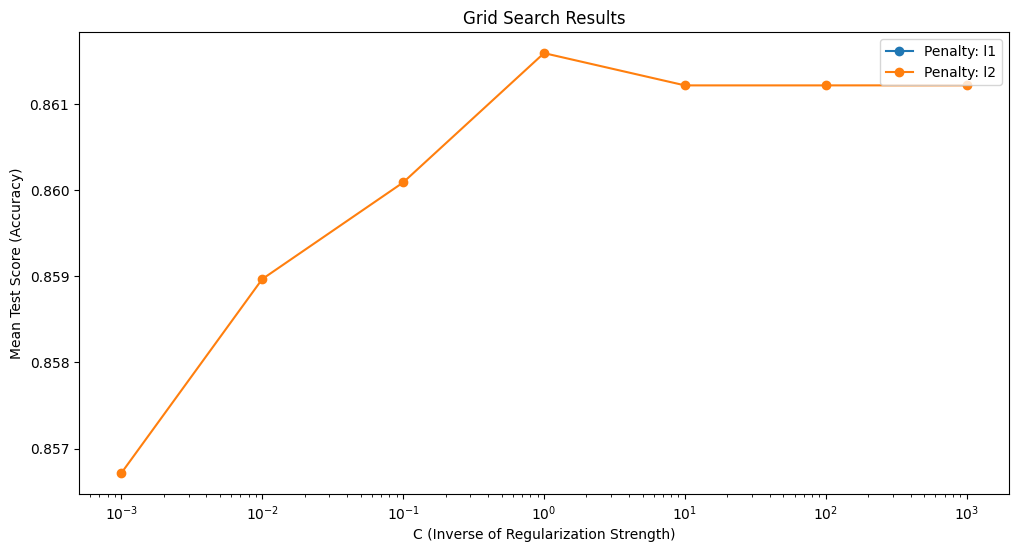

Best Hyperparameters: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Tuned Model Results:
Accuracy: 0.8545727136431784
Confusion Matrix:
[[554  12]
 [ 85  16]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       566
           1       0.57      0.16      0.25       101

    accuracy                           0.85       667
   macro avg       0.72      0.57      0.58       667
weighted avg       0.82      0.85      0.82       667



In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Prepare your data
data = pd.read_csv("dataset.csv")

# Display the first few rows of the dataset
print(data.head())

# Convert 'True.' to 1 and 'False.' to 0 in the 'Churn?' column
data['Churn?'] = np.where(data['Churn?'] == 'True.', 1, 0)
# Convert 'yes' to 1 and 'no' to 0 in the 'Int'l Plan' column
data["Int'l Plan"] = np.where(data["Int'l Plan"] == 'yes', 1, 0)
# Convert 'yes' to 1 and 'no' to 0 in the 'VMail Plan' column
data["VMail Plan"] = np.where(data["VMail Plan"] == 'yes', 1, 0)

# Step 2: Prepare your data with feature scaling and encoding
numeric_features = ['Account Length', 'Day Mins', 'Day Calls', 'Day Charge', 'Eve Mins', 'Eve Calls',
                    'Eve Charge', 'Night Mins', 'Night Calls', 'Night Charge', 'Intl Mins', 'Intl Calls',
                    'Intl Charge', 'CustServ Calls', 'VMail Message']

categorical_features = ["Int'l Plan", "VMail Plan"]

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', 'passthrough', categorical_features)
    ])

# Combine preprocessing with the logistic regression model in a pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# Step 3: Split the data into training and testing sets
X = data.drop(['State', 'Phone', 'Churn?','Area Code'], axis=1)
y = data['Churn?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Use GridSearchCV for hyperparameter tuning
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'classifier__penalty': ['l1', 'l2']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Step 5: Extract results from grid search
results = pd.DataFrame(grid_search.cv_results_)

# Plot mean test scores for each combination of parameters
plt.figure(figsize=(12, 6))
for penalty in ['l1', 'l2']:
    penalty_mask = results['param_classifier__penalty'] == penalty
    plt.plot(results[penalty_mask]['param_classifier__C'],
             results[penalty_mask]['mean_test_score'],
             marker='o', label=f'Penalty: {penalty}')

plt.title('Grid Search Results')
plt.xlabel('C (Inverse of Regularization Strength)')
plt.ylabel('Mean Test Score (Accuracy)')
plt.xscale('log')
plt.legend()
plt.show()

# Output the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Step 6: Make predictions and evaluate the tuned model
y_pred_tuned = grid_search.predict(X_test)

accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
conf_matrix_tuned = confusion_matrix(y_test, y_pred_tuned)
classification_rep_tuned = classification_report(y_test, y_pred_tuned)

# Output the results
print("Tuned Model Results:")
print(f"Accuracy: {accuracy_tuned}")
print("Confusion Matrix:")
print(conf_matrix_tuned)
print("Classification Report:")
print(classification_rep_tuned)
